<a href="https://colab.research.google.com/github/ohudBukhari/AI_Project_Course-/blob/main/Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import nltk as nltk

Read dataset and store it in DataFrame

In [4]:
reviews_df = pd.read_csv("/content/reduced_dataset.tsv",sep='\t')
reviews_df.head(5)

,label,text
0,Mixed,هو بلا شك جدل لا ينتهي إلا ليبدأ، جدل يتصارع د...
1,Negative,لم اكن قد قرأت نصف الرواية حين اشمأزيت من كثرة...
2,Negative,لو ده يعتبر كتاب ، فأنا علي كده كتبت كتب كتيرة...
3,Mixed,في ذلك الكتاب للرائع أحمد بهجت رحمة الله عليه ...
4,Mixed,الانطباع العام: جيد لكن ليس كما توقعته. فيه قص...


Choose only Books/Novels entries/Reduce dataset

In [5]:
## Function for selecting books/novels reviews only

from nltk.tree.tree import Nonterminal
def books(text):
  for i in text.split(" "):
    if i in ['رواية','الرواية','كتاب','الكتاب','الكاتب','المؤلف','الحبكة']:
      return text
  return None

In [6]:
## remove all the None rows from reviews_df
reviews_df['text']=reviews_df['text'].apply(lambda x: books(x))
reviews_df = reviews_df.dropna(axis = 0)
reviews_df.reset_index()
reviews_df.head(10)

,label,text
0,Mixed,هو بلا شك جدل لا ينتهي إلا ليبدأ، جدل يتصارع د...
1,Negative,لم اكن قد قرأت نصف الرواية حين اشمأزيت من كثرة...
2,Negative,لو ده يعتبر كتاب ، فأنا علي كده كتبت كتب كتيرة...
3,Mixed,في ذلك الكتاب للرائع أحمد بهجت رحمة الله عليه ...
4,Mixed,الانطباع العام: جيد لكن ليس كما توقعته. فيه قص...
5,Negative,تتلخص فكرة الكتاب في ان هناك ثلاثة نقاط تجتمع ...
6,Negative,مستوى الكتاب أقل بكثير من المتوقع من الدكتور ج...
7,Positive,لقد فتحت الرواية خزائن مشاعر آثرت أن أواريها م...
8,Negative,مستفزة لأبعد الحدود. معلش كبداية فين علامات ال...
9,Negative,سأعترف أني لم أنهي هذا الكتاب وتوقفت بعد قراءة...


In [7]:
'''## Reducing the size of the dataset since the Lemmatize function takes too long
# Create a new dataframe with the minimum number of rows for each label
reduced_df = reviews_df.sample(frac=0.13)
reviews_df = reduced_df
# Save the reduced dataframe
reduced_df.to_csv("reduced_dataset.csv", index=False)
'''

'## Reducing the size of the dataset since the Lemmatize function takes too long\n# Create a new dataframe with the minimum number of rows for each label\nreduced_df = reviews_df.sample(frac=0.13)\nreviews_df = reduced_df\n# Save the reduced dataframe\nreduced_df.to_csv("reduced_dataset.csv", index=False)\n'

Dataset Info/Statistcs 

In [8]:
reviews_df.tail()

,label,text
1022,Mixed,لم أعرف رواية أربكتنى بعدد نجومها التى تستحق ك...
1023,Negative,أن تقرأ كتابا بدافع الفضول مع التسليم التام بأ...
1024,Negative,ايه دا فلم مصري ولا ايه = =. اول مرة بقرأ لنجي...
1025,Positive,تنهى القراءة و تود لو أنك تبدأها من جديد ، تود...
1026,Positive,كتاب رائع ينصح بقرائته . .. كتب في فترة قبل نش...


In [9]:
reviews_df.shape

(1027, 2)

In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1026
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1027 non-null   object
 1   text    1027 non-null   object
dtypes: object(2)
memory usage: 24.1+ KB


In [11]:
reviews_df.describe()

,label,text
count,1027,1027
unique,3,1027
top,Negative,هو بلا شك جدل لا ينتهي إلا ليبدأ، جدل يتصارع د...
freq,351,1


In [12]:
reviews_df.label.value_counts()

Negative    351
Mixed       344
Positive    332
Name: label, dtype: int64

In [13]:
reviews_df.label.value_counts(normalize=True)

Negative    0.341772
Mixed       0.334956
Positive    0.323272
Name: label, dtype: float64

<Axes: ylabel='label'>

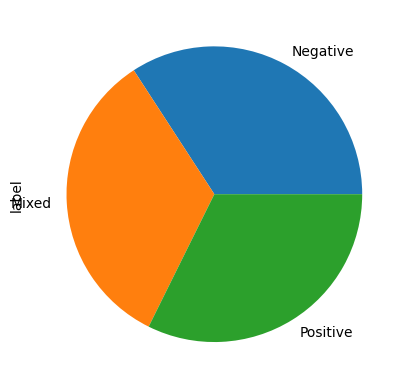

In [14]:
reviews_df.label.value_counts(normalize=True).plot.pie()

In [15]:
reviews_df.isnull().value_counts()

label  text 
False  False    1027
dtype: int64

In [16]:
df=reviews_df.copy()

Second Phase

1.Removing punctuation,Standardisation

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punct(text):
    punc= string.punctuation+"؟،“”؛"
    text_no_punct="".join([char for char in text if char not in punc])
    return text_no_punct

In [19]:
reviews_df['text_no_punct']=reviews_df['text'].apply(lambda x: remove_punct(x))

2.Tokenization using: 1- regex and split   2- NLTK

In [20]:
#Tokeniziation (White-Spaceing)
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
reviews_df['text_tokenize']=reviews_df['text'].apply(lambda x: word_tokenize(x))

In [22]:
import re

In [23]:
reviews_df['text_token_re']=reviews_df['text_no_punct'].apply(lambda x:re.split('\W+', x))

3.Removing Stop- words using NLTK

In [24]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
stopwords_Ar=nltk.corpus.stopwords.words('arabic')

In [26]:
#stopwords_Ar

In [27]:
def remove_stopwords(s):
    return [x for x in s if x not in stopwords_Ar]

In [28]:
reviews_df['text_stopword']=reviews_df['text_token_re'].apply(lambda x:remove_stopwords(x))

4.Stemming

In [29]:
import nltk
from nltk.stem.isri import ISRIStemmer
p_stemmer = ISRIStemmer()

In [30]:
def stem(s):
  return [p_stemmer.stem(token) for token in s]

In [31]:
reviews_df['text_stems'] = reviews_df['text_stopword'].apply(lambda x: stem(x))

5.Lemmatization

In [32]:
!pip install qalsadi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.6/256.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.6/332.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 18.5 MB/s eta 0:00:00
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4254 sha256=0f309bd89f6d1f23fe18e717174a32560d6d0c63e80d110e09383a3b02569e31
  Stored in directory: /root/.cache/pip/wheels/31/99/ef/8bf3

In [33]:
import qalsadi.lemmatizer

In [34]:
lemmer = qalsadi.lemmatizer.Lemmatizer()
lemmer.lemmatize("")

''

In [35]:
def lemtaization(s):
  return [lemmer.lemmatize(token) for token in s]

In [36]:
reviews_df['text_lemmatize'] = reviews_df['text_stopword'].apply(lambda x: lemtaization(x))

In [37]:
def join_text(set):
    text = ""
    for word in set:
        text += word + " "
    return text
reviews_df['text_cleaned'] = reviews_df['text_stems'].apply(lambda x: join_text(x))

3.Vectorizing by using Count Vectorization

In [38]:
'''from sklearn .feature_extraction.text import  CountVectorizer

max_features = 1500
count_vector = CountVectorizer(max_features = max_features)  
features_cv = count_vector.fit_transform(reviews_df['text_cleaned'])


print(features_cv.shape)
print('Sparse Matrix :ln', features_cv)
import pandas as pd
features_cv = pd.DataFrame(features_cv.toarray())
features_cv.columns = count_vector.get_feature_names_out()'''

"from sklearn .feature_extraction.text import  CountVectorizer\n\nmax_features = 1500\ncount_vector = CountVectorizer(max_features = max_features)  \nfeatures_cv = count_vector.fit_transform(reviews_df['text_cleaned'])\n\n\nprint(features_cv.shape)\nprint('Sparse Matrix :ln', features_cv)\nimport pandas as pd\nfeatures_cv = pd.DataFrame(features_cv.toarray())\nfeatures_cv.columns = count_vector.get_feature_names_out()"

In [39]:
#features_cv.info()

In [40]:
#print("most using {} words: {} ".format(max_features, count_vector.get_feature_names_out()))

In [41]:
#print(count_vector.vocabulary_)

Word Embeddings + tf/idf model

In [42]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [43]:
import keras_preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten, Input

import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path

# Packages for data preparation
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [44]:
NB_WORDS = 14000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
MAX_LEN = 24
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
GLOVE_DIM = 50  # Number of dimensions of the GloVe word embeddings

In [45]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    return history


def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results
 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(reviews_df.text_cleaned, reviews_df.label, test_size=0.25, random_state=37)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [48]:
# Create the TF-IDF features
tfidf = TfidfVectorizer()
tfidf_features = tfidf.fit_transform(X_train)
tfidf_features_test = tfidf.transform(X_test)


In [49]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))

In [50]:
'''  
pad the sequences in X_train_seq with zeros (0) or truncates them 
  to ensure that all sequences have the same length
'''

X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [51]:
# Concatenate the TF-IDF features with the sequences of integers horizontally
#X_train_seq_trunc = np.hstack([tfidf_features.toarray(), X_train_seq_trunc])
#X_test_seq_trunc = np.hstack([tfidf_features_test.toarray(), X_test_seq_trunc])

In [52]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [53]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.25, random_state=37)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]


In [54]:
input_shape = X_train_seq_trunc.shape[1]
emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=input_shape))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(3, activation='softmax'))

In [55]:
emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)

Epoch 1/20
2/2 [==============================] - 1s 270ms/step - loss: 1.0979 - accuracy: 0.3397 - val_loss: 1.0956 - val_accuracy: 0.3886
Epoch 2/20
2/2 [==============================] - 0s 49ms/step - loss: 1.0896 - accuracy: 0.4281 - val_loss: 1.0953 - val_accuracy: 0.3523
Epoch 3/20
2/2 [==============================] - 0s 40ms/step - loss: 1.0831 - accuracy: 0.5043 - val_loss: 1.0951 - val_accuracy: 0.3679
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 1.0776 - accuracy: 0.5667 - val_loss: 1.0951 - val_accuracy: 0.3679
Epoch 5/20
2/2 [==============================] - 0s 89ms/step - loss: 1.0722 - accuracy: 0.6066 - val_loss: 1.0948 - val_accuracy: 0.3679
Epoch 6/20
2/2 [==============================] - 0s 75ms/step - loss: 1.0669 - accuracy: 0.6534 - val_loss: 1.0947 - val_accuracy: 0.3782
Epoch 7/20
2/2 [==============================] - 0s 76ms/step - loss: 1.0618 - accuracy: 0.6932 - val_loss: 1.0946 - val_accuracy: 0.3782
Epoch 8/20
2/2 [==========

In [56]:
emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

9/9 [==============================] - 0s 3ms/step - loss: 1.1003 - accuracy: 0.3502
/n
Test accuracy of word embeddings model: 35.02%


TF-IDF

N-gram count + tf/idf features + splitting data for training

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [58]:
# Count vector
from sklearn .feature_extraction.text import  CountVectorizer
count_vector = CountVectorizer()  
features_cv = count_vector.fit_transform(reviews_df['text_cleaned'])
features_cv = pd.DataFrame(features_cv.toarray())


In [59]:
print(features_cv)

      0     1     2     3     4     5     6     7     8     9     ...  7636  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1022     0     0     0     0     0     0     0     0     0     0  ...     0   
1023     0     0     0     0     0     0     0     0     0     0  ...     0   
1024     0     0     0     0     0     0     0     0     0     0  ...     0   
1025     0     0     0     0     0     0     0     0     0     0  ...     0   
1026     0     0     0     0     0     0     0     0     0     0  ...     0   

      7637  7638  7639  7640  7641  7642  7643  764

In [60]:
## tf/idf vector
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
features_tfidf = tfidf.fit_transform(reviews_df['text_cleaned'])
features_tfidf = pd.DataFrame(features_tfidf.toarray())

In [61]:
# remove all unnecessery columns
target = reviews_df['label']
reviews_df = df.drop(['label','text'], inplace=True, axis=1)

In [62]:
## concatenate the two vectors
reviews_df = pd.concat([reviews_df,pd.DataFrame(features_cv)], axis = 1)
reviews_df = pd.concat([reviews_df,pd.DataFrame(features_tfidf)], axis = 1)

In [63]:
##split data for training test size 25%
X_train, X_test, y_train, y_test = train_test_split(reviews_df, target, test_size=0.25)

Machine learning using random forest, naieve bays, and support vector machine.

In [64]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print('Accuracy: {0:.2f}%', (accuracy*100))

Accuracy: {0:.2f}% 44.3579766536965


In [65]:
# Train the model
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print('Accuracy: {0:.2f}%', (accuracy*100))

Accuracy: {0:.2f}% 40.46692607003891


In [66]:
# Train the model
model = SVC()
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print('Accuracy: {0:.2f}%', (accuracy*100))

Accuracy: {0:.2f}% 34.24124513618677
